In [24]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [25]:
babies = pd.read_csv("babies.data", sep ="\s+")
babies

,bwt,gestation,parity,age,height,weight,smoke
0,120,284,0,27,62,100,0
1,113,282,0,33,64,135,0
2,128,279,0,28,64,115,1
3,123,999,0,36,69,190,0
4,108,282,0,23,67,125,1
...,...,...,...,...,...,...,...
1231,113,275,1,27,60,100,0
1232,128,265,0,24,67,120,0
1233,130,291,0,30,65,150,1
1234,125,281,1,21,65,110,0


In [26]:
babies.shape

(1236, 7)

In [27]:
babies["bwt_num_gestation"] = babies["bwt"]/babies["gestation"]

In [28]:
babies

,bwt,gestation,parity,age,height,weight,smoke,bwt_num_gestation
0,120,284,0,27,62,100,0,0.422535
1,113,282,0,33,64,135,0,0.400709
2,128,279,0,28,64,115,1,0.458781
3,123,999,0,36,69,190,0,0.123123
4,108,282,0,23,67,125,1,0.382979
...,...,...,...,...,...,...,...,...
1231,113,275,1,27,60,100,0,0.410909
1232,128,265,0,24,67,120,0,0.483019
1233,130,291,0,30,65,150,1,0.446735
1234,125,281,1,21,65,110,0,0.444840


<Axes: >

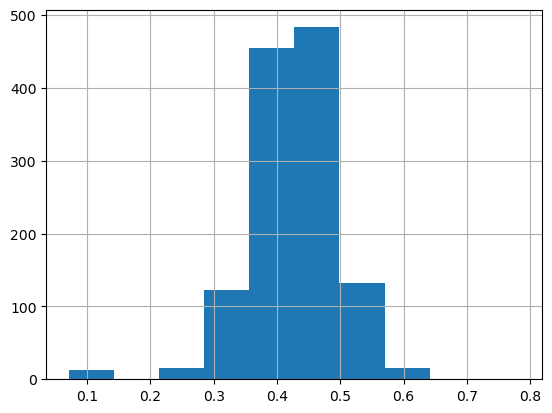

In [30]:
babies["bwt_num_gestation"].hist()

In [31]:
babies["bwt_num_gestation"].median()

0.42832681017612523

In [32]:
bootstrap_sample = babies.sample(1236, replace = True)

In [33]:
bootstrap_sample

,bwt,gestation,parity,age,height,weight,smoke,bwt_num_gestation
1048,136,283,1,24,63,119,0,0.480565
293,121,276,1,23,71,152,1,0.438406
75,127,274,0,21,62,110,0,0.463504
132,112,294,0,25,64,125,1,0.380952
1162,160,291,0,34,64,110,1,0.549828
...,...,...,...,...,...,...,...,...
361,71,234,0,32,64,110,1,0.303419
742,155,283,1,19,70,137,0,0.547703
970,113,306,1,21,65,137,0,0.369281
742,155,283,1,19,70,137,0,0.547703


In [21]:
bootstrap_sample["bwt_num_gestation"].median()

0.43006993006993005

In [39]:
median_list = []
for i in range(5000):
    bootstrap_sample = babies.sample(1236, replace = True)
    bootstrap_median = bootstrap_sample["bwt_num_gestation"].median()
    median_list.append(bootstrap_median)
pd.Series(median_list).median()

0.42832681017612523

<Axes: >

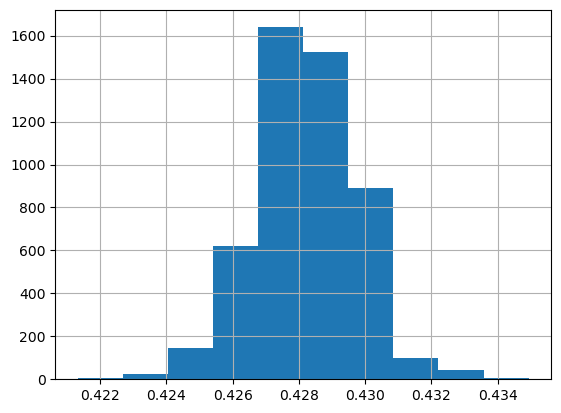

In [44]:
pd.Series(median_list).hist()

In [47]:
pd.Series(median_list).quantile(0.025)

0.4253246753246753

In [49]:
pd.Series(median_list).quantile(0.975)

0.43103448275862066

In [67]:
smoker_filter = babies["smoke"] == 1
num_smoker = smoker_filter.sum()
num_smoker

484

In [65]:
num_birth = babies.shape[0]
num_birth

1236

In [74]:
484/1236

0.39158576051779936

<Axes: >

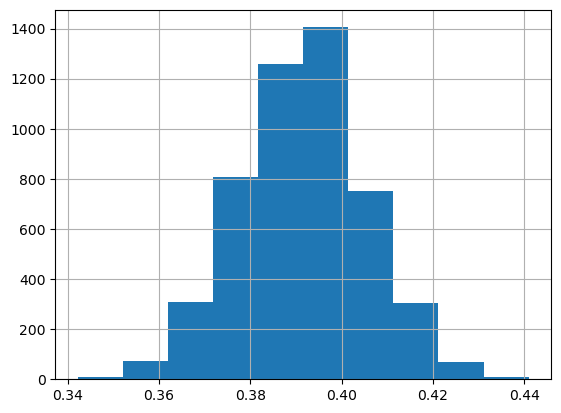

In [77]:
proportion_list = []
for i in range(5000):
    bootstrap_sample = babies.sample(1236, replace = True)
    smoker_filter = bootstrap_sample["smoke"] == 1
    num_smoker = smoker_filter.sum()
    proportion_smoker = num_smoker /1236
    proportion_list.append(proportion_smoker)
pd.Series(proportion_list).hist()